# Importing Required Libraries 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read csv iris file
ir = pd.read_csv("IRIS.csv")

In [3]:
ir.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#cheacking any null value present in dataset or not
ir.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [6]:
ir.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
ir.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [8]:
ir["species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# Data visualization 

In [9]:
ir.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:xlabel='species', ylabel='Count'>

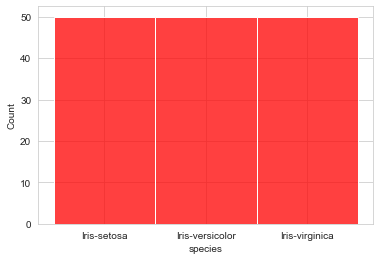

In [10]:
sns.set_style('whitegrid')
sns.histplot(ir['species'], kde = False, color ='red', bins = 30)


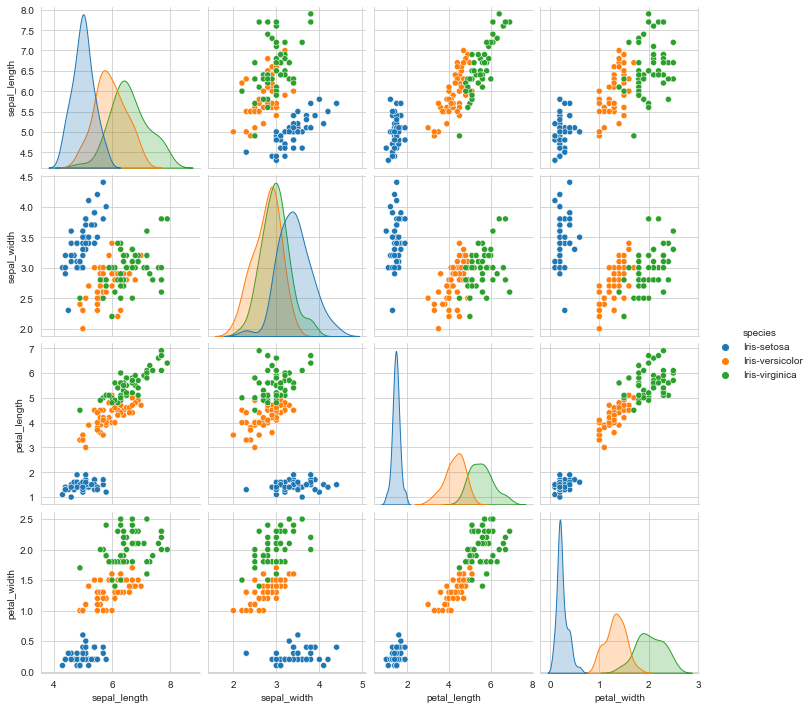

In [11]:
sns.pairplot(ir, hue='species')


<AxesSubplot:xlabel='species', ylabel='sepal_length'>

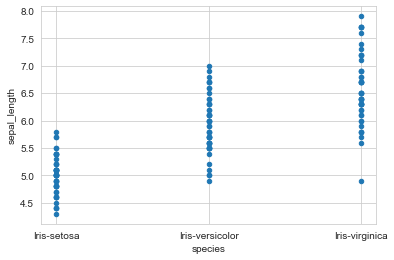

In [12]:
ir.plot(kind = 'scatter', x = 'species', y = 'sepal_length')


In [13]:
ir.replace({"species":{"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2}},inplace=True)

In [14]:
ir.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
ir["species"].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [16]:
X =ir[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]


In [17]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
y = ir["species"]

In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

# Splitting Data

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [22]:
x_train.shape,x_test.shape

((120, 4), (30, 4))

In [23]:
y_train.shape,y_test.shape

((120,), (30,))

# Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression()

In [26]:
model.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred=model.predict(x_test)


In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix


In [29]:
confusion_matrix(y_test,y_pred)


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [30]:
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))


Accuracy of the model is 100.00


# Support Vector Machine

In [31]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(x_train, y_train)

SVC()

In [32]:
pred = svn.predict(x_test)



In [37]:
confusion_matrix(y_test,pred)


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))


Accuracy of the model is 100.00
